In [1]:
import pandas as pd
df=pd.read_csv('/content/survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print(df.shape)

print(df.describe())

print(df.info())


(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [6]:
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)

In [7]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:
intDefault = 0
strDefault = 'NaN'
floatDefault = 0.0

intColumns = ['Age']
strColumns = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
              'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
              'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
              'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
              'seek_help']
floatColumns = []

for col in df.columns:
    if col in intColumns:
        df[col] = df[col].fillna(intDefault)
    elif col in strColumns:
        df[col] = df[col].fillna(strDefault)
    elif col in floatColumns:
        df[col] = df[col].fillna(floatDefault)
    else:
        print(f'Error: Column {col} not found.')
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
male_terms = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_terms = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_terms = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for _, row in df.iterrows():
    if str.lower(row.Gender) in male_terms:
        df.loc[df['Gender'] == row.Gender, 'Gender'] = 'male'
    elif str.lower(row.Gender) in female_terms:
        df.loc[df['Gender'] == row.Gender, 'Gender'] = 'female'
    elif str.lower(row.Gender) in trans_terms:
        df.loc[df['Gender'] == row.Gender, 'Gender'] = 'trans'



print(df['Gender'].unique())


['female' 'male' 'trans' 'A little about you' 'p']


In [11]:
lst = ['A little about you', 'p']
df = df[~df['Gender'].isin(lst)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

age_series = pd.Series(df['Age'])
age_series[age_series < 18] = df['Age'].median()
df['Age'] = age_series

age_series = pd.Series(df['Age'])
age_series[age_series > 120] = df['Age'].median()
df['Age'] = age_series

df['age_range'] = pd.cut(df['Age'], [0, 20, 30, 65, 100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)


In [14]:
df['self_employed'] = df['self_employed'].replace([strDefault], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [15]:
df['work_interfere'] = df['work_interfere'].replace([strDefault], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [16]:
df = df.drop(['Country'], axis= 1)
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,No,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,No,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [18]:
labelDict = {}
for feature in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    labelDict[f'label_{feature}'] = list(le_name_mapping.keys())

for key, value in labelDict.items():
    print(key, value)


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_cow

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

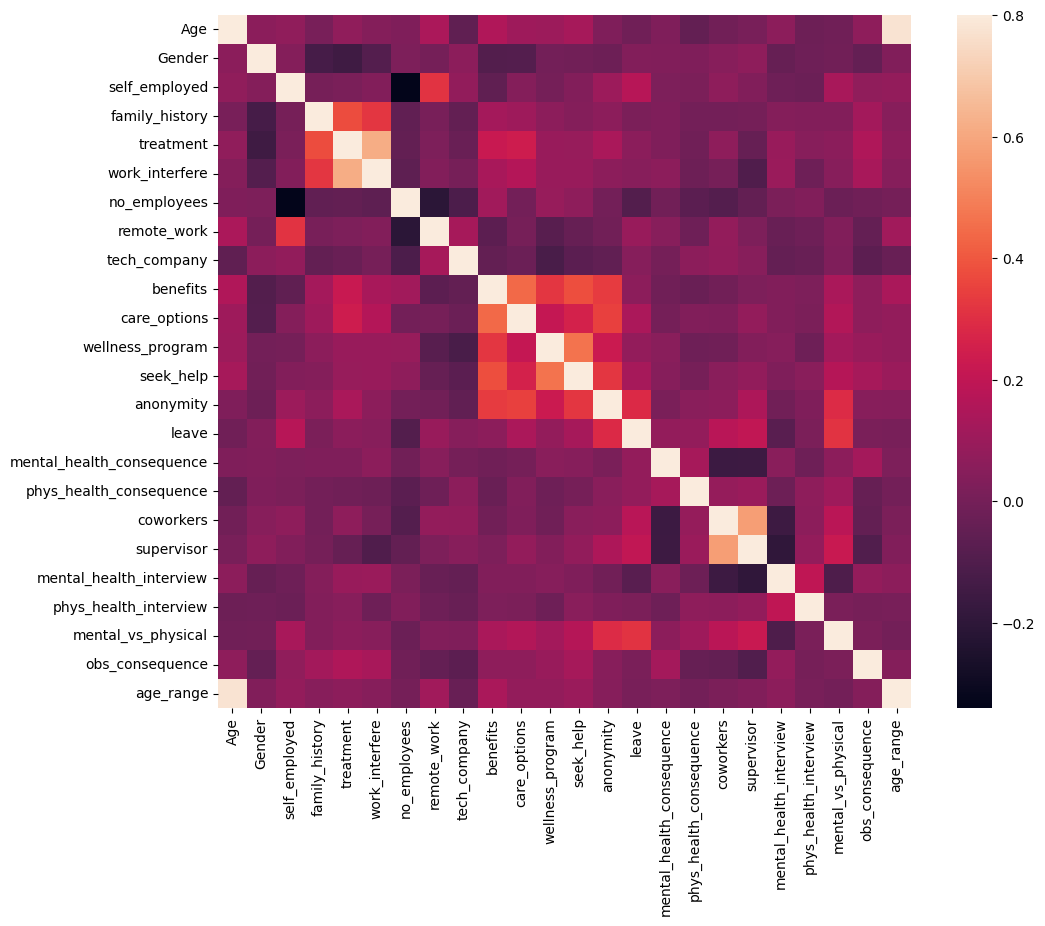

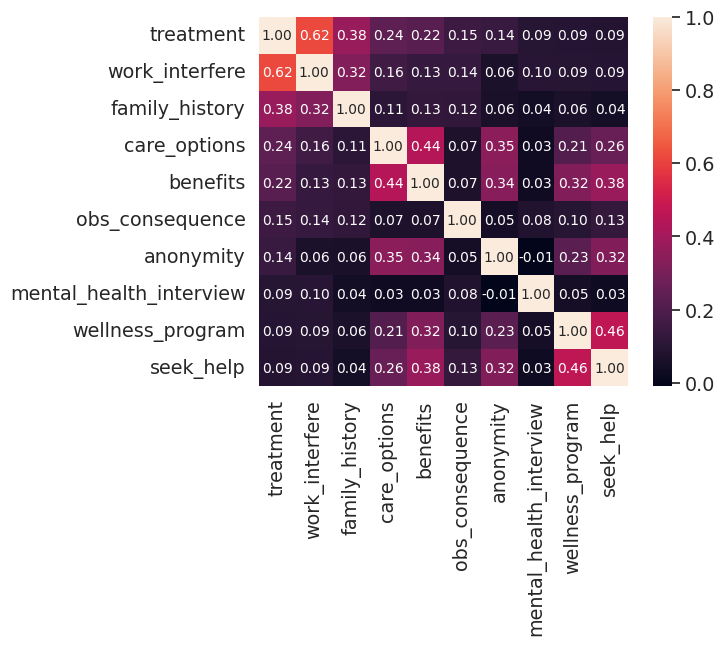

In [21]:
corrmat = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

top_k = 10
cols = corrmat.nlargest(top_k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values)
plt.show()


<ipython-input-22-96165850e1d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], bins=24)


Text(0.5, 0, 'Age')

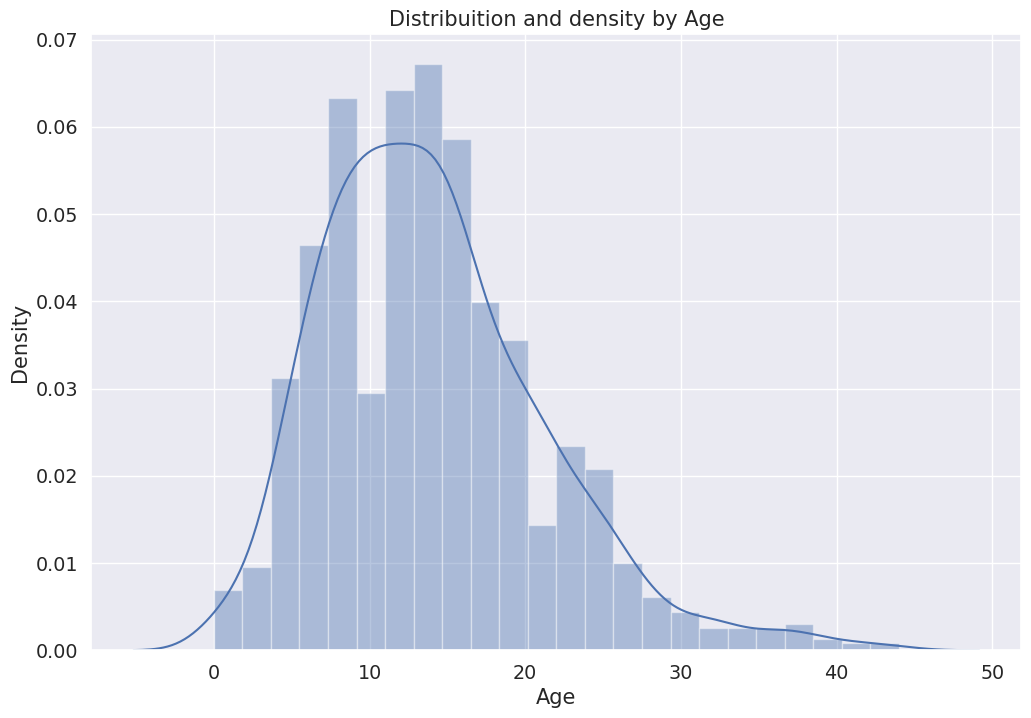

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")


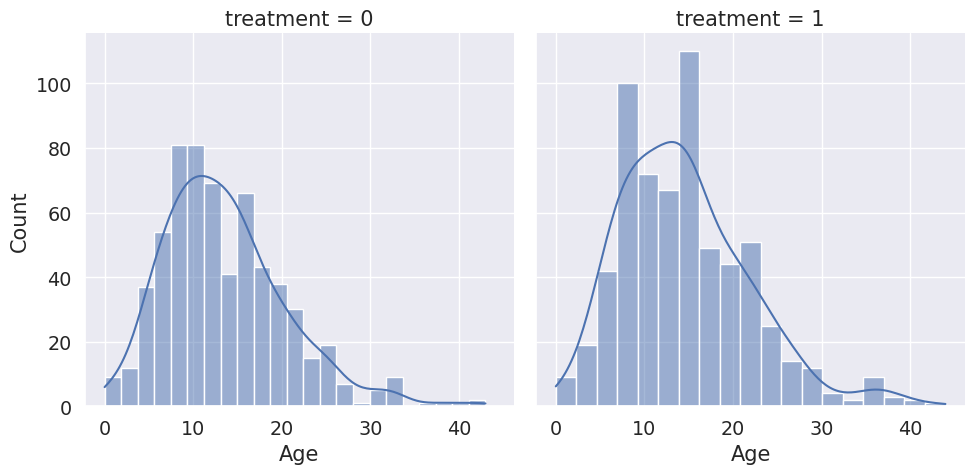

In [23]:
g = sns.FacetGrid(df, col='treatment', height=5)
g.map(sns.histplot, "Age", kde=True)


<ipython-input-24-c8f98c98e04c>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribuition by treated or not')

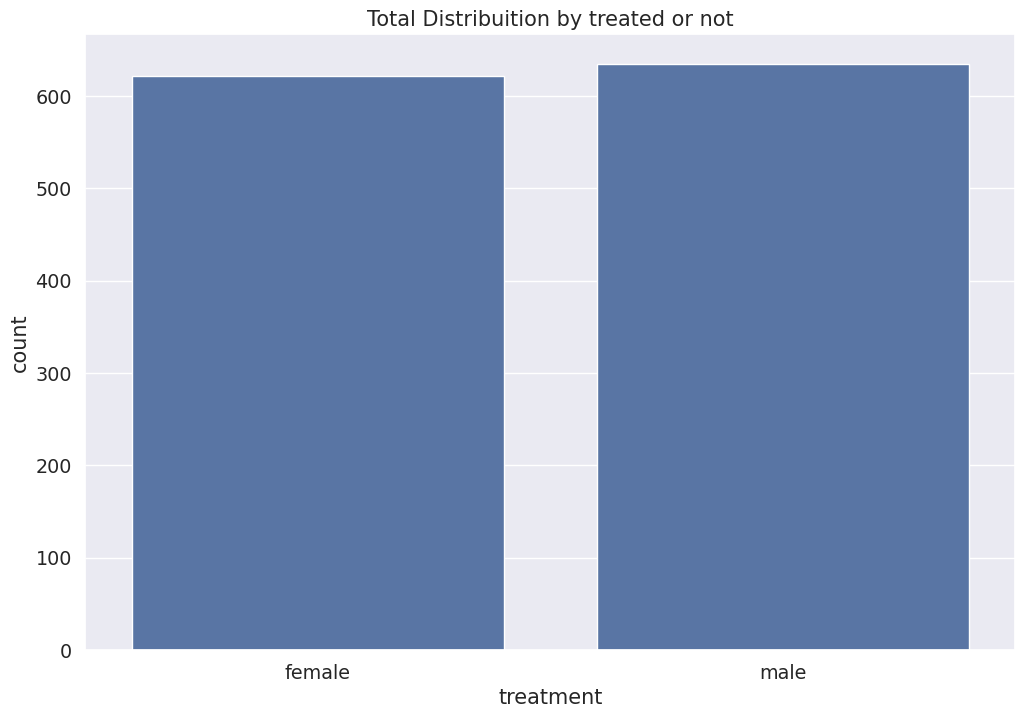

In [24]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

<ipython-input-25-1cbe0be23f1c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


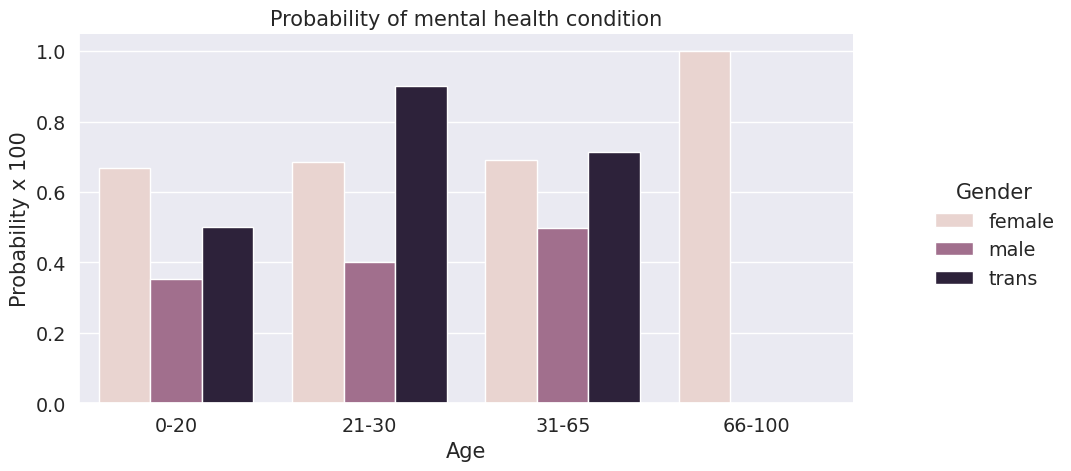

In [25]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

new_labels = labelDict['label_Gender']
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


<ipython-input-26-17d01d6c259a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


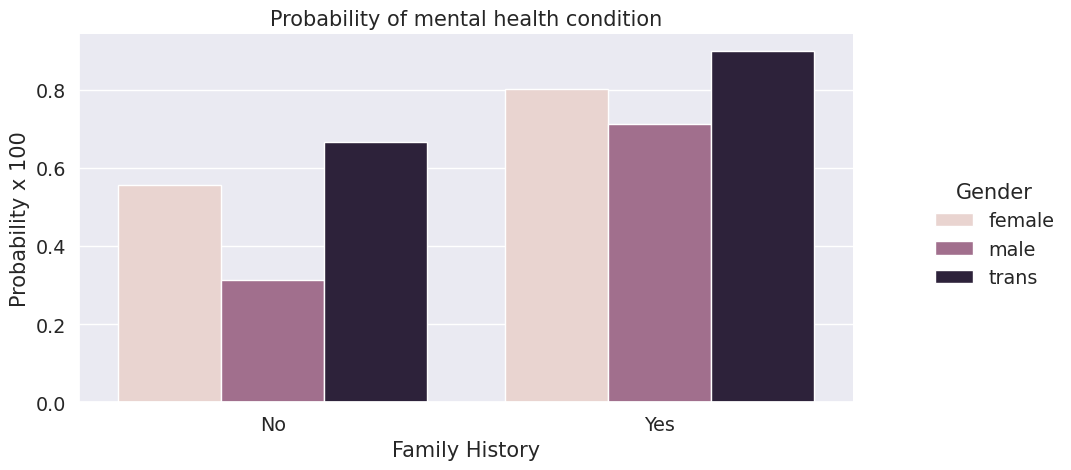

In [26]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

new_labels = labelDict['label_Gender']
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


<ipython-input-27-b80152e5d50b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


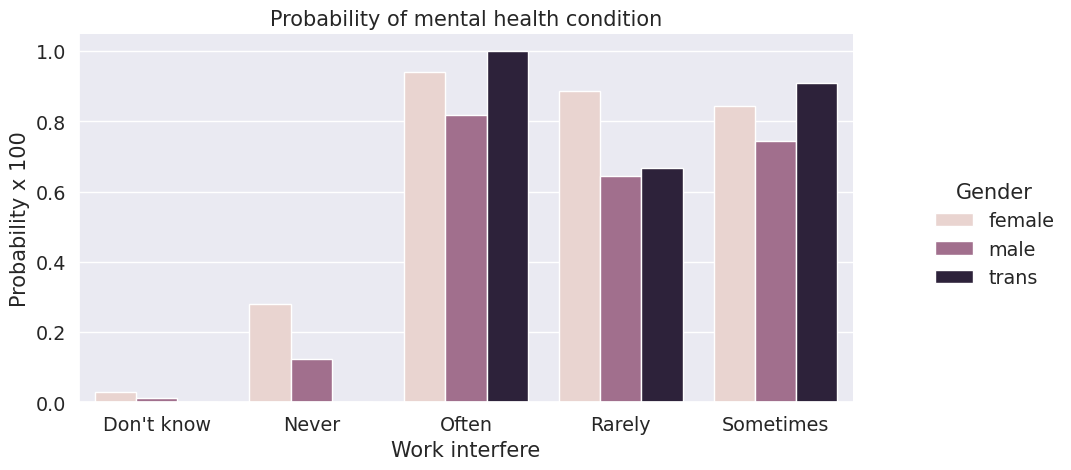

In [27]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

new_labels = labelDict['label_Gender']
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


In [28]:
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [29]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [30]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

methodDict = {}
rmseDict = ()


In [31]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=513e2a0a4ee4b29552c2ca807218ff310752d3ef541c12c565b5821dde4fea81
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

In [33]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Dictionary to store performance metrics
methodDict = {}
rmseDict = {}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])  # for binary classification

    methodDict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # For RMSE (Root Mean Squared Error) (if regression model is used, but here classification is used)
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    rmseDict[name] = rmse

# Display metrics

metrics_df = pd.DataFrame(methodDict).T
print(metrics_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest        0.798942   0.791855  0.853659  0.821596  0.863654
XGBoost              0.767196   0.772093  0.809756  0.790476  0.844537
Logistic Regression  0.801587   0.792793  0.858537  0.824356  0.855759


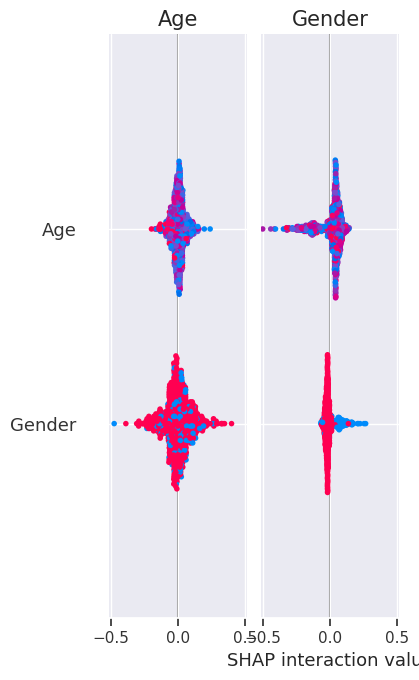

In [34]:
# Choose a model, e.g., RandomForest
model_to_explain = models['Random Forest']

# SHAP values
explainer = shap.TreeExplainer(model_to_explain)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train)


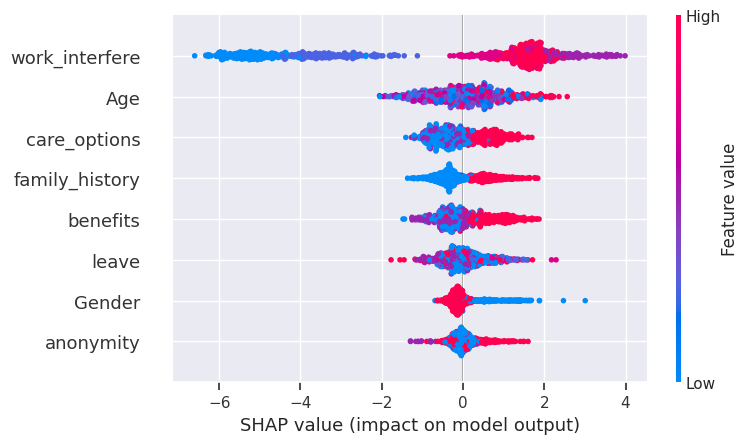

In [35]:
# Choose a model, e.g., RandomForest
model_to_explain = models['XGBoost']

# SHAP values
explainer = shap.TreeExplainer(model_to_explain)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train)


  0%|          | 0/879 [00:00<?, ?it/s]

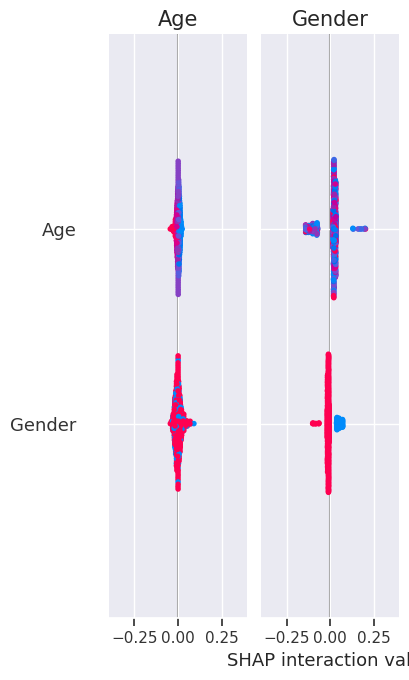

In [36]:
import shap

# Choose a model to explain (e.g., Logistic Regression)
model_to_explain = models['Logistic Regression']

# SHAP values using KernelExplainer for Logistic Regression
explainer = shap.KernelExplainer(model_to_explain.predict_proba, X_train)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train)


In [37]:
# LIME for model interpretation
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode='classification', class_names=["No", "Yes"], discretize_continuous=True)

# Choose an instance to explain
i = 1  # or choose any other index
explanation = explainer.explain_instance(X_test.iloc[i].values, model_to_explain.predict_proba)

# Show LIME explanation
explanation.show_in_notebook()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [42]:
# Ensure X_train, X_test, y_train, y_test are in the correct format
X_train = X_train.values if hasattr(X_train, 'values') else X_train
X_test = X_test.values if hasattr(X_test, 'values') else X_test
y_train = y_train.ravel()  # Flatten to 1D if necessary
y_test = y_test.ravel()    # Flatten to 1D if necessary

# Check shapes to confirm they are correct
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(879, 8)
(378, 8)
(879,)
(378,)


In [43]:
def create_neural_network(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),

        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [44]:
X = df[feature_cols]
y = df.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Neural Network': create_neural_network(X_train.shape[1])
}

# Dictionary to store performance metrics
methodDict = {}

for name, model in models.items():
    if name == 'Neural Network':
        # For Neural Network, we use .fit method specific to Keras
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions (0 or 1)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # For models with predict_proba method
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For binary classification

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    methodDict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }


metrics_df = pd.DataFrame(methodDict).T


print(metrics_df)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest        0.804233   0.801843  0.848780  0.824645  0.867757
XGBoost              0.767196   0.772093  0.809756  0.790476  0.844537
Logistic Regression  0.801587   0.792793  0.858537  0.824356  0.855759
Neural Network       0.820106   0.786611  0.917073  0.846847  0.881193


**Tuning Hyper parameters**

In [55]:
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define the neural network creation function with parameters for hyperparameter tuning
def create_neural_network(input_dim, learning_rate=0.001, dropout_rate=0.3, num_units_1=128, num_units_2=64):
    model = Sequential([
        Dense(num_units_1, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(num_units_2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(32, activation='relu'),

        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define hyperparameter combinations to test manually
param_combinations = [
    {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'dropout_rate': 0.3, 'num_units_1': 128, 'num_units_2': 64},
    {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'dropout_rate': 0.3, 'num_units_1': 64, 'num_units_2': 32},
    {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01, 'dropout_rate': 0.5, 'num_units_1': 128, 'num_units_2': 64},
    # Add more combinations as needed
]

# Dictionary to store results
results = []

# Loop through each hyperparameter combination
for params in param_combinations:
    # Wrap the neural network model in KerasClassifier from scikeras
    model_nn = KerasClassifier(model=create_neural_network,
                               input_dim=X_train.shape[1],
                               batch_size=params['batch_size'],
                               epochs=params['epochs'],
                               learning_rate=params['learning_rate'],
                               dropout_rate=params['dropout_rate'],
                               num_units_1=params['num_units_1'],
                               num_units_2=params['num_units_2'],
                               verbose=0)

    # Train the model
    model_nn.fit(X_train, y_train)

    # Make predictions
    y_pred_prob = model_nn.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions (0 or 1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Store results
    results.append({
        'params': params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                                              params  Accuracy  Precision  \
0  {'batch_size': 32, 'epochs': 10, 'learning_rat...  0.806878   0.777311   
1  {'batch_size': 64, 'epochs': 10, 'learning_rat...  0.785714   0.729630   
2  {'batch_size': 32, 'epochs': 20, 'learning_rat...  0.817460   0.776423   

     Recall  F1-Score   ROC-AUC  
0  0.902439  0.835214  0.798040  
1  0.960976  0.829474  0.769505  
2  0.931707  0.847007  0.806894  


**We will go with the model with the highest Recall**

In [56]:
# Recreate the model with the best hyperparameters
best_model = create_neural_network(
    input_dim=X_train.shape[1],
    learning_rate=0.01,
    dropout_rate=0.3,
    num_units_1=64,
    num_units_2=32
)

# Train the model with the chosen hyperparameters
best_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Evaluate the model on the test set
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions (0 or 1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

print(metrics)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.6185 - loss: 0.7962
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 0.4203 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 0.4238 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8056 - loss: 0.3978 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8116 - loss: 0.4206 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8209 - loss: 0.3916 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8326 - loss: 0.3878 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.3953 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.4084 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8185 - loss: 0.3833 
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
{'Accuracy': 0.7883597883597884, 'Precision': 0.7340823970037453, 'Recall': 0.9560975609756097, 'F1-Score': 0.830508474

In [57]:
# Save the trained model
best_model.save('/content/mental_health_model.h5')
print("Model saved to /content/mental_health_model.h5")


Model saved to /content/mental_health_model.h5


In [93]:
from IPython.display import display, Markdown

def show_assessment(data):
    """Display mental health assessment as formatted Markdown"""
    md = f"""
## Mental Health Assessment Summary

**Needs Treatment:** {"Yes" if data['Needs_Treatment'] else "No"}
**Confidence Level:** {data['Confidence']*100:.0f}%

---

### Explanation
{data['Explanation']}

---

⚠️ *Note: This is not medical advice. For emergencies, contact a healthcare professional immediately.*
    """
    display(Markdown(md))



In [72]:
import numpy as np
import pandas as pd
import google.generativeai as genai

# Configure Gemini API
GEMINI_API_KEY = "Your api key"  # Replace with your actual API key
genai.configure(api_key=GEMINI_API_KEY) # Configure Gemini API

def predict_mental_health(model, X_input, feature_cols):
    # Convert input into DataFrame
    input_df = pd.DataFrame([X_input], columns=feature_cols)

    # Get prediction from Neural Network
    prediction_prob = model.predict(input_df)[0][0]  # Assuming your model returns probabilities
    prediction = int(prediction_prob > 0.5)  # Convert probability to binary output (1 = needs treatment)

    if prediction == 1:
        # Use Gemini AI for explanation & recommendations
        prompt = f"""
        The following individual has been predicted to need mental health treatment based on their attributes:

        ### **User Profile:**
        - Age: {X_input['Age']}
        - Gender: {X_input['Gender']}
        - Family history of mental health issues: {X_input['family_history']}
        - Access to mental health benefits: {X_input['benefits']}
        - Availability of care options: {X_input['care_options']}
        - Workplace anonymity regarding mental health: {X_input['anonymity']}
        - Leave policy for mental health: {X_input['leave']}
        - Work interference with mental well-being: {X_input['work_interfere']}

        ### **Analysis & Explanation:**
        1. Explain why this individual's profile suggests they may need mental health support.
        2. Identify potential risk factors based on the given attributes.

        ### **Personalized Recommendations:**
        - **Coping Strategies:** Suggest evidence-based techniques (e.g., mindfulness, therapy, lifestyle changes).
        - **Next Steps:** Provide practical guidance on seeking support, self-care, or professional intervention.
        - **Resources:** Recommend online platforms, mental health apps, or professional services that can help.

        Ensure the response is **empathetic, supportive, and easy to understand.** Provide actionable insights while maintaining a reassuring tone.
        """
    else:
      prompt = f"""
          The following individual has been predicted to be in good mental health, with no major concerns identified based on their attributes:

          ### **User Profile:**
          - Age: {X_input['Age']}
          - Gender: {X_input['Gender']}
          - Family history of mental health issues: {X_input['family_history']}
          - Access to mental health benefits: {X_input['benefits']}
          - Availability of care options: {X_input['care_options']}
          - Workplace anonymity regarding mental health: {X_input['anonymity']}
          - Leave policy for mental health: {X_input['leave']}
          - Work interference with mental well-being: {X_input['work_interfere']}

          ### **Analysis & Explanation:**
          1. Explain why this individual's profile suggests they are in good mental health.
          2. Emphasize the importance of continuing good mental health practices to maintain well-being.

          ### **Personalized Recommendations:**
          - **Mental Health Awareness:** Remind the individual that mental health is important and should be regularly checked.
          - **Self-Care Tips:** Encourage practices that promote good mental well-being, such as mindfulness, exercise, and social connections.
          - **Prevention:** Offer suggestions for staying proactive in managing stress, maintaining a healthy lifestyle, and seeking support if needed.
          - **Resources:** Suggest resources for ongoing mental health education and support.

          Ensure the response is **uplifting**, focusing on the **maintenance of mental well-being** and how to continue nurturing a positive mental health lifestyle.
          """

    model = genai.GenerativeModel("gemini-2.0-flash-001") # Specify the model you want to use
    response = model.generate_content(contents=prompt)
    explanation = response.text


    return {
        "Needs_Treatment": bool(prediction),
        "Confidence": round(prediction_prob, 2),
        "Explanation": explanation
    }



In [94]:

user_input = {
    'Age': 54,
    'Gender': 1,
    'family_history': 1,
    'benefits': 1,
    'care_options': 1,
    'anonymity': 0,
    'leave': 1,
    'work_interfere': 1
}


result = predict_mental_health(best_model, user_input, feature_cols)
final_result = show_assessment(result)
print(final_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step



## Mental Health Assessment Summary

**Needs Treatment:** Yes  
**Confidence Level:** 86%  

---

### Explanation
Okay, let's break down this profile and offer some helpful recommendations. It sounds like this individual might be going through a tough time, and it's important to approach this with sensitivity and understanding.

### **Analysis & Explanation:**

1.  **Why this individual's profile suggests they may need mental health support:**

    Based on the information provided, several factors suggest this person might benefit from mental health support. The combination of a **family history of mental health issues (1)** and **work interference with mental well-being (1)** is particularly concerning. A family history means they might have a genetic predisposition to certain conditions, and when coupled with workplace stress, it can significantly impact their mental health. While they have access to resources (benefits, care options, leave policy), the fact that **workplace anonymity is lacking (0)** could be a significant barrier to actually accessing those resources due to fear of stigma or repercussions at work. The fact that "work interferes with mental well-being" is a strong indicator that professional help is needed to manage the problems.

2.  **Potential Risk Factors:**

    *   **Family History:** Increases the likelihood of experiencing mental health challenges.
    *   **Work Interference:** High stress levels, burnout, anxiety, and depression are common consequences of work negatively impacting well-being.
    *   **Lack of Anonymity:** Creates a barrier to seeking help due to fear of judgment, discrimination, or professional consequences. This can prevent the individual from utilizing the available benefits, care options, and leave policy.
    *   **Age (54):** While not inherently a risk factor, it's important to acknowledge that individuals at this age might be dealing with additional life stressors like career transitions, caring for aging parents, or experiencing age-related health concerns.

### **Personalized Recommendations:**

It's important to remember that these are general recommendations, and a professional assessment is always the best way to determine the most appropriate course of action.

*   **Coping Strategies:**

    *   **Mindfulness and Meditation:** Practicing mindfulness can help manage stress and improve overall well-being. Apps like Headspace and Calm offer guided meditations for beginners. Just taking 5-10 minutes each day to focus on the present moment can make a difference.
    *   **Therapy:** Cognitive Behavioral Therapy (CBT) and Acceptance and Commitment Therapy (ACT) are evidence-based therapies that can help manage stress, anxiety, and depression. CBT helps identify and change negative thought patterns, while ACT focuses on accepting difficult emotions and committing to valued actions. Consider exploring online therapy options if in-person therapy is not readily accessible or comfortable.
    *   **Lifestyle Changes:**
        *   **Regular Exercise:** Physical activity releases endorphins, which have mood-boosting effects. Aim for at least 30 minutes of moderate-intensity exercise most days of the week.
        *   **Healthy Diet:** A balanced diet can improve mood and energy levels. Focus on whole foods, fruits, vegetables, and lean protein.
        *   **Sufficient Sleep:** Aim for 7-9 hours of quality sleep each night. Create a relaxing bedtime routine and make sure your sleep environment is dark, quiet, and cool.
        *   **Social Connection:** Spend time with loved ones and engage in activities that bring joy and connection. Strong social support is crucial for mental well-being.
    *   **Stress Management Techniques:**
        *   **Deep Breathing Exercises:** Simple breathing exercises can quickly calm the nervous system.
        *   **Progressive Muscle Relaxation:** This technique involves tensing and releasing different muscle groups to reduce tension throughout the body.
        *   **Journaling:** Writing down thoughts and feelings can help process emotions and gain perspective.

*   **Next Steps:**

    *   **Self-Assessment:** Before making any big decisions, consider using a validated online mental health screening tool (e.g., from Mental Health America or the National Alliance on Mental Illness) to gain a better understanding of symptoms. This isn't a diagnosis, but it can help identify areas of concern.
    *   **Talk to Someone Trusted:** Sharing concerns with a friend, family member, or trusted colleague can provide emotional support and encouragement to seek professional help.
    *   **Contact HR:** Even though there's a lack of anonymity, it's worth contacting HR to understand the specific mental health benefits available. You can ask about Employee Assistance Programs (EAPs), which often offer confidential counseling services. Phrase your inquiry in a general way, emphasizing the need for information on available resources.
    *   **Consult a Healthcare Professional:** Schedule an appointment with a primary care physician or mental health professional for a formal assessment. They can provide a diagnosis and recommend appropriate treatment options. Don't hesitate to emphasize the impact of work stress and concerns about anonymity on your mental well-being.
    *   **Explore Anonymous Support Groups:** Online or in-person support groups can offer a safe and supportive environment to connect with others who are facing similar challenges. Look for groups specifically focused on workplace stress or anxiety.
    *   **Consider Job Modifications (if possible and safe):** This is a long-term plan, but if the work environment is consistently detrimental to mental health, explore options for job modifications or a change in roles within the company. This may not be immediately feasible, but it's a valuable consideration.

*   **Resources:**

    *   **Online Platforms:**
        *   **Talkspace/BetterHelp:** These platforms offer online therapy with licensed therapists.
        *   **7 Cups:** Provides free, anonymous emotional support from trained listeners.
    *   **Mental Health Apps:**
        *   **Headspace/Calm:** Meditation and mindfulness apps for stress reduction and improved sleep.
        *   **Moodfit:** Offers personalized tools and insights to improve mood and well-being.
    *   **Professional Services:**
        *   **Psychiatrists:** Medical doctors who can diagnose and treat mental health conditions, including prescribing medication.
        *   **Psychologists:** Provide therapy and psychological assessments.
        *   **Licensed Clinical Social Workers (LCSWs):** Offer therapy and connect individuals with community resources.
    *   **National Organizations:**
        *   **Mental Health America (MHA):** [https://www.mhanational.org/](https://www.mhanational.org/)
        *   **National Alliance on Mental Illness (NAMI):** [https://www.nami.org/](https://www.nami.org/)
        *   **Substance Abuse and Mental Health Services Administration (SAMHSA):** [https://www.samhsa.gov/](https://www.samhsa.gov/)

Remember, seeking help is a sign of strength. It's okay to not be okay, and there are people who care and want to support you. Don't hesitate to reach out and take care of yourself. You deserve to feel better.


---

⚠️ *Note: This is not medical advice. For emergencies, contact a healthcare professional immediately.*
    

None
